In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer

In [3]:
X, y = load_breast_cancer(return_X_y=True)

In [4]:
type(X)

numpy.ndarray

In [5]:
X.shape

(569, 30)

In [6]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [7]:
# normalizujemo podatke ukoliko imamo neke atribute koje odstupaju bas od standarnih vrednosti 
# kod drveta odlucivanja 
# normalizacija je bitna akko racunamo neka rastojanja 
# stablo odlucivanja - donosim odluku o vrednosti atributa 


In [8]:
(y == 0).sum()

212

In [9]:
(y == 1).sum()

357

In [10]:
from sklearn.model_selection import train_test_split 
import pandas as pd

/tmp/ipykernel_958/116615968.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [11]:
df = pd.DataFrame(X)

In [12]:
df.isna().sum().sum()

0

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)
# stratify=y ---- da raspodela bude ista 
# 

In [14]:
X_train.shape

(455, 30)

In [15]:
X_test.shape

(114, 30)

In [16]:
y_test.shape

(114,)

In [17]:
y_train.shape

(455,)

In [18]:
# max_depth --- ogranicavamo fleksiblnost naseg modela => regularizacija
# kako bi smo regurisali stabla, potrebno je da ogranicimo dubinu stabla ili da izvrsimo potkresivanje

model = DecisionTreeClassifier(max_depth=3)

In [19]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [20]:
model.feature_importances_

array([0.        , 0.03740186, 0.        , 0.        , 0.        ,
       0.        , 0.03288351, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00986182, 0.76434517, 0.        ,
       0.        , 0.        , 0.15550765, 0.        , 0.        ])

In [21]:
from sklearn.tree import plot_tree

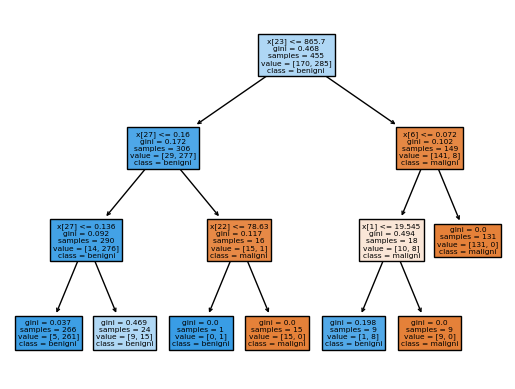

In [22]:
_ = plot_tree(model, class_names=['maligni', 'benigni'], filled=True)

In [23]:
# u zavisnosti od toga kakva je raspodela, zavisi koja je nijansa boje
# interpretacija = kada dobijemo model, mozemo da izracunamo tacnost, i da ga interpretiramo
# 

In [24]:
# kategoricki atribut koji nije numericki 
# kada su kategorije koje su dovoljno slicne = ako je redni atribut 
# sa imenskim atributima, mozemo da delimo ali tako da stablo ne bude binrno 
# pravimo BINARIZACIJU 
# boja napravimo atribut koji su svi binarni 

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
y_train_pred = model.predict(X_train)

In [27]:
y_train_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,

In [28]:
accuracy_score(y_train, y_train_pred)

0.967032967032967

In [29]:
# ovo gore znaci da se nas model prilagodio podacima

In [30]:
y_test_pred = model.predict(X_test)

In [31]:
accuracy_score(y_test, y_test_pred)

0.9649122807017544

In [32]:
# acc = 0.99 
# imamo preprilagodjavanje 
# nas model moze da bude da ima tacnost od 99%

# tacnost nam nije dobra metrika ukoliko nemamo balansiranost izmedju podataka

# ovaj model deluje da 
# ovaj model deluje da je dobar ako imamo bas retke bolesti, ili npr. ako na aerodromu trazimo kriminalce
# - nemalasiran skupp podataka
# - 

In [33]:
# matrica konfuzije


In [34]:
from sklearn.metrics import confusion_matrix

In [35]:
confusion_matrix(y_test, y_test_pred)

array([[40,  2],
       [ 2, 70]])

In [36]:
# moramo pre svega ovoga sto radimo da pogledamo kakva je raspodela za Y

In [37]:
# ako imamo vise klasa --- imamo neke mere koje izvodimo iz matirce konfuzije
# true_positive_rate --- TPR = TP/(TP + FP)
# precision --- p = TP/(TP + FP)
# recall --- r = TP/(TP + FP)


#   nije   jeste 

#   990    0
#    10    0

# p = 0.99
# r = 1


# P ili R ce dam reci da li je nas model glup
# ako nema R = 1, a P = 0
# indikator da nesto nije u redu nam je F1 Score --- harmonijska redina dva broja (zato sto je harmonijska sredina bliza manjem broju)
# F1 - je nesto sto koristimo (objedinjuje nam P i R)

In [38]:
from sklearn.metrics import f1_score

In [39]:
f1_score(y_test, y_test_pred)

0.9722222222222222